In [4]:
import os

label_path = "ddd.v1i.yolov8/test/labels"  # 라벨 txt가 들어있는 폴더

for file in os.listdir(label_path):
    if file.endswith(".txt"):
        fpath = os.path.join(label_path, file)
        with open(fpath, "r") as f:
            lines = f.readlines()
        
        new_lines = []
        for line in lines:
            parts = line.strip().split()
            parts[0] = str(int(parts[0]) + 1)  # 클래스 번호 +1
            new_lines.append(" ".join(parts) + "\n")
        
        with open(fpath, "w") as f:
            f.writelines(new_lines)

In [2]:
from ultralytics import YOLO

# Detection 전용 모델 로드
model = YOLO('yolov8n.pt')

# 학습 시작
model.train(
    data='dataset/data.yaml',  # 앞서 만든 yaml 경로
    epochs=50,                            # 원하는 에폭 수
    imgsz=640,                            # 입력 이미지 크기
    batch=16,                             # 배치 사이즈 (GPU 성능에 맞춰 조절)
    device='cuda',                        # GPU 사용
    project="D:/yolo8_results",           # 결과 저장 폴더
    name="exp1",                          # 결과 하위 폴더 이름
    save=True
)

Ultralytics 8.3.198  Python-3.10.18 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 6144MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=exp19, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, p

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000226EC50B670>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0

In [1]:
import torch, ultralytics, sys
print(sys.executable)
print("torch:", torch.__version__, "| torch.version.cuda:", torch.version.cuda)
print("cuda_available:", torch.cuda.is_available(), "| device_count:", torch.cuda.device_count())
ultralytics.checks()

Ultralytics 8.3.198  Python-3.10.18 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 6144MiB)
Setup complete  (16 CPUs, 31.9 GB RAM, 688.1/931.5 GB disk)


In [3]:
from ultralytics import YOLO
# best.pt 경로 확인 후 수정
model = YOLO("D:/yolo8_results/exp19/weights/best.pt")

In [51]:
# test.jpg -> 실제 테스트할 이미지 경로로 바꿔
results = model.predict(source="C:/Users/BF_Lee/OneDrive/바탕 화면/stock-photo-rotten-mushrooms-covered-with-mold-in-fridge-533140732.jpg", save=True, device=0, conf = 0.6)  
# device=0 -> GPU, CPU로 강제하려면 device="cpu"


image 1/1 C:\Users\BF_Lee\OneDrive\ \stock-photo-rotten-mushrooms-covered-with-mold-in-fridge-533140732.jpg: 480x640 (no detections), 61.9ms
Speed: 4.6ms preprocess, 61.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Results saved to C:\Users\BF_Lee\runs\detect\predict2


In [49]:
# results 리스트 안에 예측 결과가 들어 있음
for r in results:
    print(r.boxes)        # 바운딩 박스 좌표/클래스/신뢰도
    # r.show()            # 주피터에서 직접 시각화 (OpenCV 창 띄움)
    r.plot()              # Matplotlib으로 표시할 수 있는 이미지 ndarray 반환

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.], device='cuda:0')
conf: tensor([0.9559], device='cuda:0')
data: tensor([[337.5651, 115.0257, 560.3981, 389.7678,   0.9559,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (1080, 1440)
shape: torch.Size([1, 6])
xywh: tensor([[448.9816, 252.3967, 222.8330, 274.7421]], device='cuda:0')
xywhn: tensor([[0.3118, 0.2337, 0.1547, 0.2544]], device='cuda:0')
xyxy: tensor([[337.5651, 115.0257, 560.3981, 389.7678]], device='cuda:0')
xyxyn: tensor([[0.2344, 0.1065, 0.3892, 0.3609]], device='cuda:0')


In [13]:
%matplotlib inline
import matplotlib
matplotlib.use('module://matplotlib_inline.backend_inline')

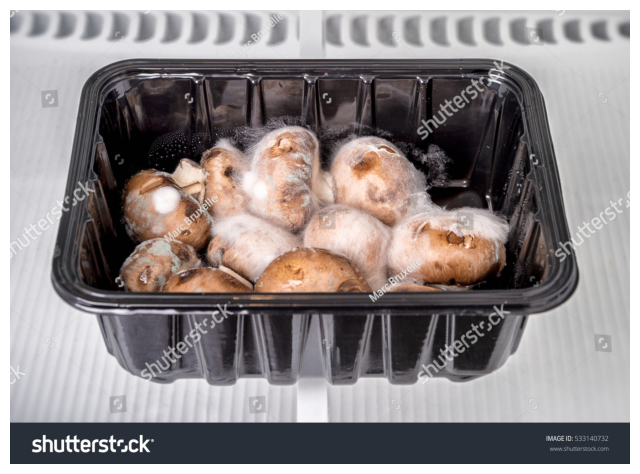

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from PIL import Image

for r in results:                     # 이미 모델/추론 끝났다면 results만 사용
    im = r.plot()                     # 예측 그려진 이미지 (np.ndarray 또는 PIL.Image)
    if isinstance(im, np.ndarray):    # ndarray(BGR)인 경우
        plt.figure(figsize=(8, 8))
        plt.imshow(im[..., ::-1])     # BGR -> RGB
        plt.axis("off")
        plt.show()                    # ← 반드시!
    else:                             # PIL.Image인 경우(버전따라 그럴 수 있음)
        display(im)